In [1]:
# Loading important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

## Data Preparation

In [2]:
# Reading dataset and printing top rows
data = pd.read_csv("Bank_Campaign.csv", sep = ";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Print summary statistics of the dataset
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
# Iterate through each character column and print unique values
chr_cols = data.select_dtypes(include='object').columns

for column in chr_cols:
    unique_values = data[column].unique()
    print(f"Column: {column}")
    print("Unique Values:")
    for value in unique_values:
        print(f"  {value}")
    print("---")

Column: job
Unique Values:
  housemaid
  services
  admin.
  blue-collar
  technician
  retired
  management
  unemployed
  self-employed
  unknown
  entrepreneur
  student
---
Column: marital
Unique Values:
  married
  single
  divorced
  unknown
---
Column: education
Unique Values:
  basic.4y
  high.school
  basic.6y
  basic.9y
  professional.course
  unknown
  university.degree
  illiterate
---
Column: default
Unique Values:
  no
  unknown
  yes
---
Column: housing
Unique Values:
  no
  yes
  unknown
---
Column: loan
Unique Values:
  no
  yes
  unknown
---
Column: contact
Unique Values:
  telephone
  cellular
---
Column: month
Unique Values:
  may
  jun
  jul
  aug
  oct
  nov
  dec
  mar
  apr
  sep
---
Column: day_of_week
Unique Values:
  mon
  tue
  wed
  thu
  fri
---
Column: poutcome
Unique Values:
  nonexistent
  failure
  success
---
Column: subscribed
Unique Values:
  no
  yes
---


In [5]:
# Data dimensions
data.shape

(41188, 21)

In [6]:
# Cleaning categorical columns
data['poutcome'].replace("nonexistent", np.nan, inplace=True)
data['loan'].replace("unknown", np.nan, inplace=True)
data['housing'].replace("unknown", np.nan, inplace=True)
data['default'].replace("unknown", np.nan, inplace=True)
data['education'].replace("unknown", np.nan, inplace=True)
data['marital'].replace("unknown", np.nan, inplace=True)
data['job'].replace("unknown", np.nan, inplace=True)
data.isna().sum()

age                   0
job                 330
marital              80
education          1731
default            8597
housing             990
loan                990
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome          35563
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
subscribed            0
dtype: int64

In [7]:
# Removing columns with more than 30% missing values and removing observations
data = data.drop(['poutcome', 'pdays'], axis = 1)
data_temp = data.dropna()

## Exploratory Data Analysis

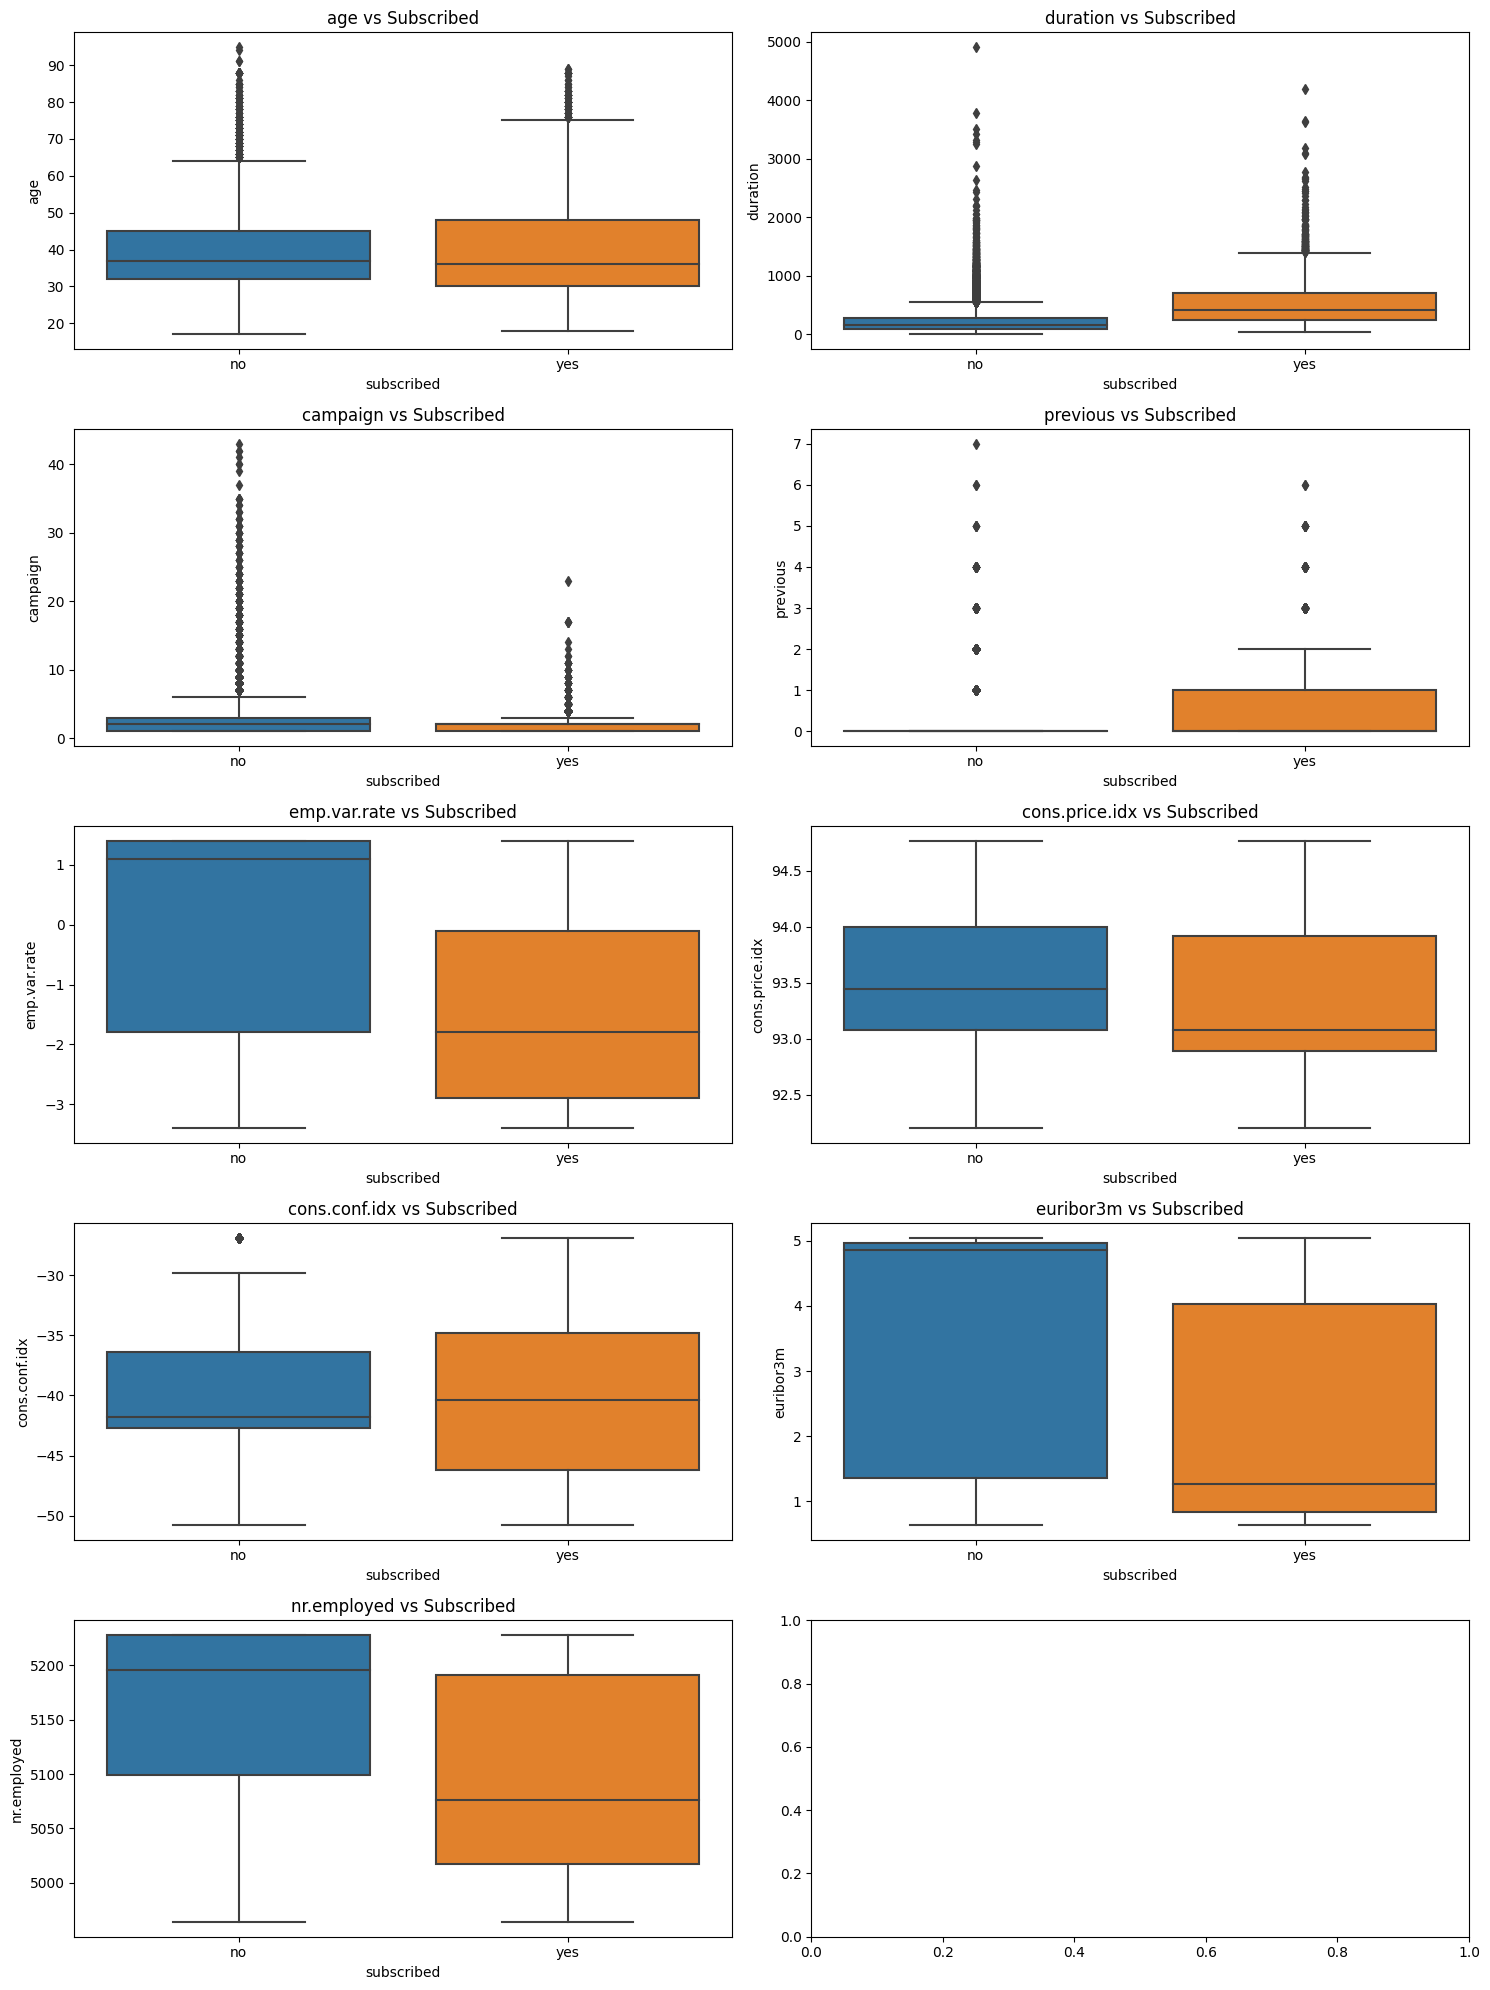

In [8]:
# Set up subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

# Flatten the axes for easy iteration
axes = axes.flatten()

cols_num = ['age', 'duration', 'campaign','previous', 'emp.var.rate', 'cons.price.idx',
            'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed']

# Loop through columns and create plots
for i, column in enumerate(cols_num):
    if column != 'subscribed':
        # Bar plot for categorical variables
        if data_temp[column].dtype == 'object':
            sns.countplot(x=column, hue='subscribed', data=data_temp, ax=axes[i])
            axes[i].set_title(f'{column} vs Subscribed')
            axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
        else:
            # Box plot for numerical variables
            sns.boxplot(x='subscribed', y=column, data=data_temp, ax=axes[i])
            axes[i].set_title(f'{column} vs Subscribed')

plt.tight_layout()
plt.show()

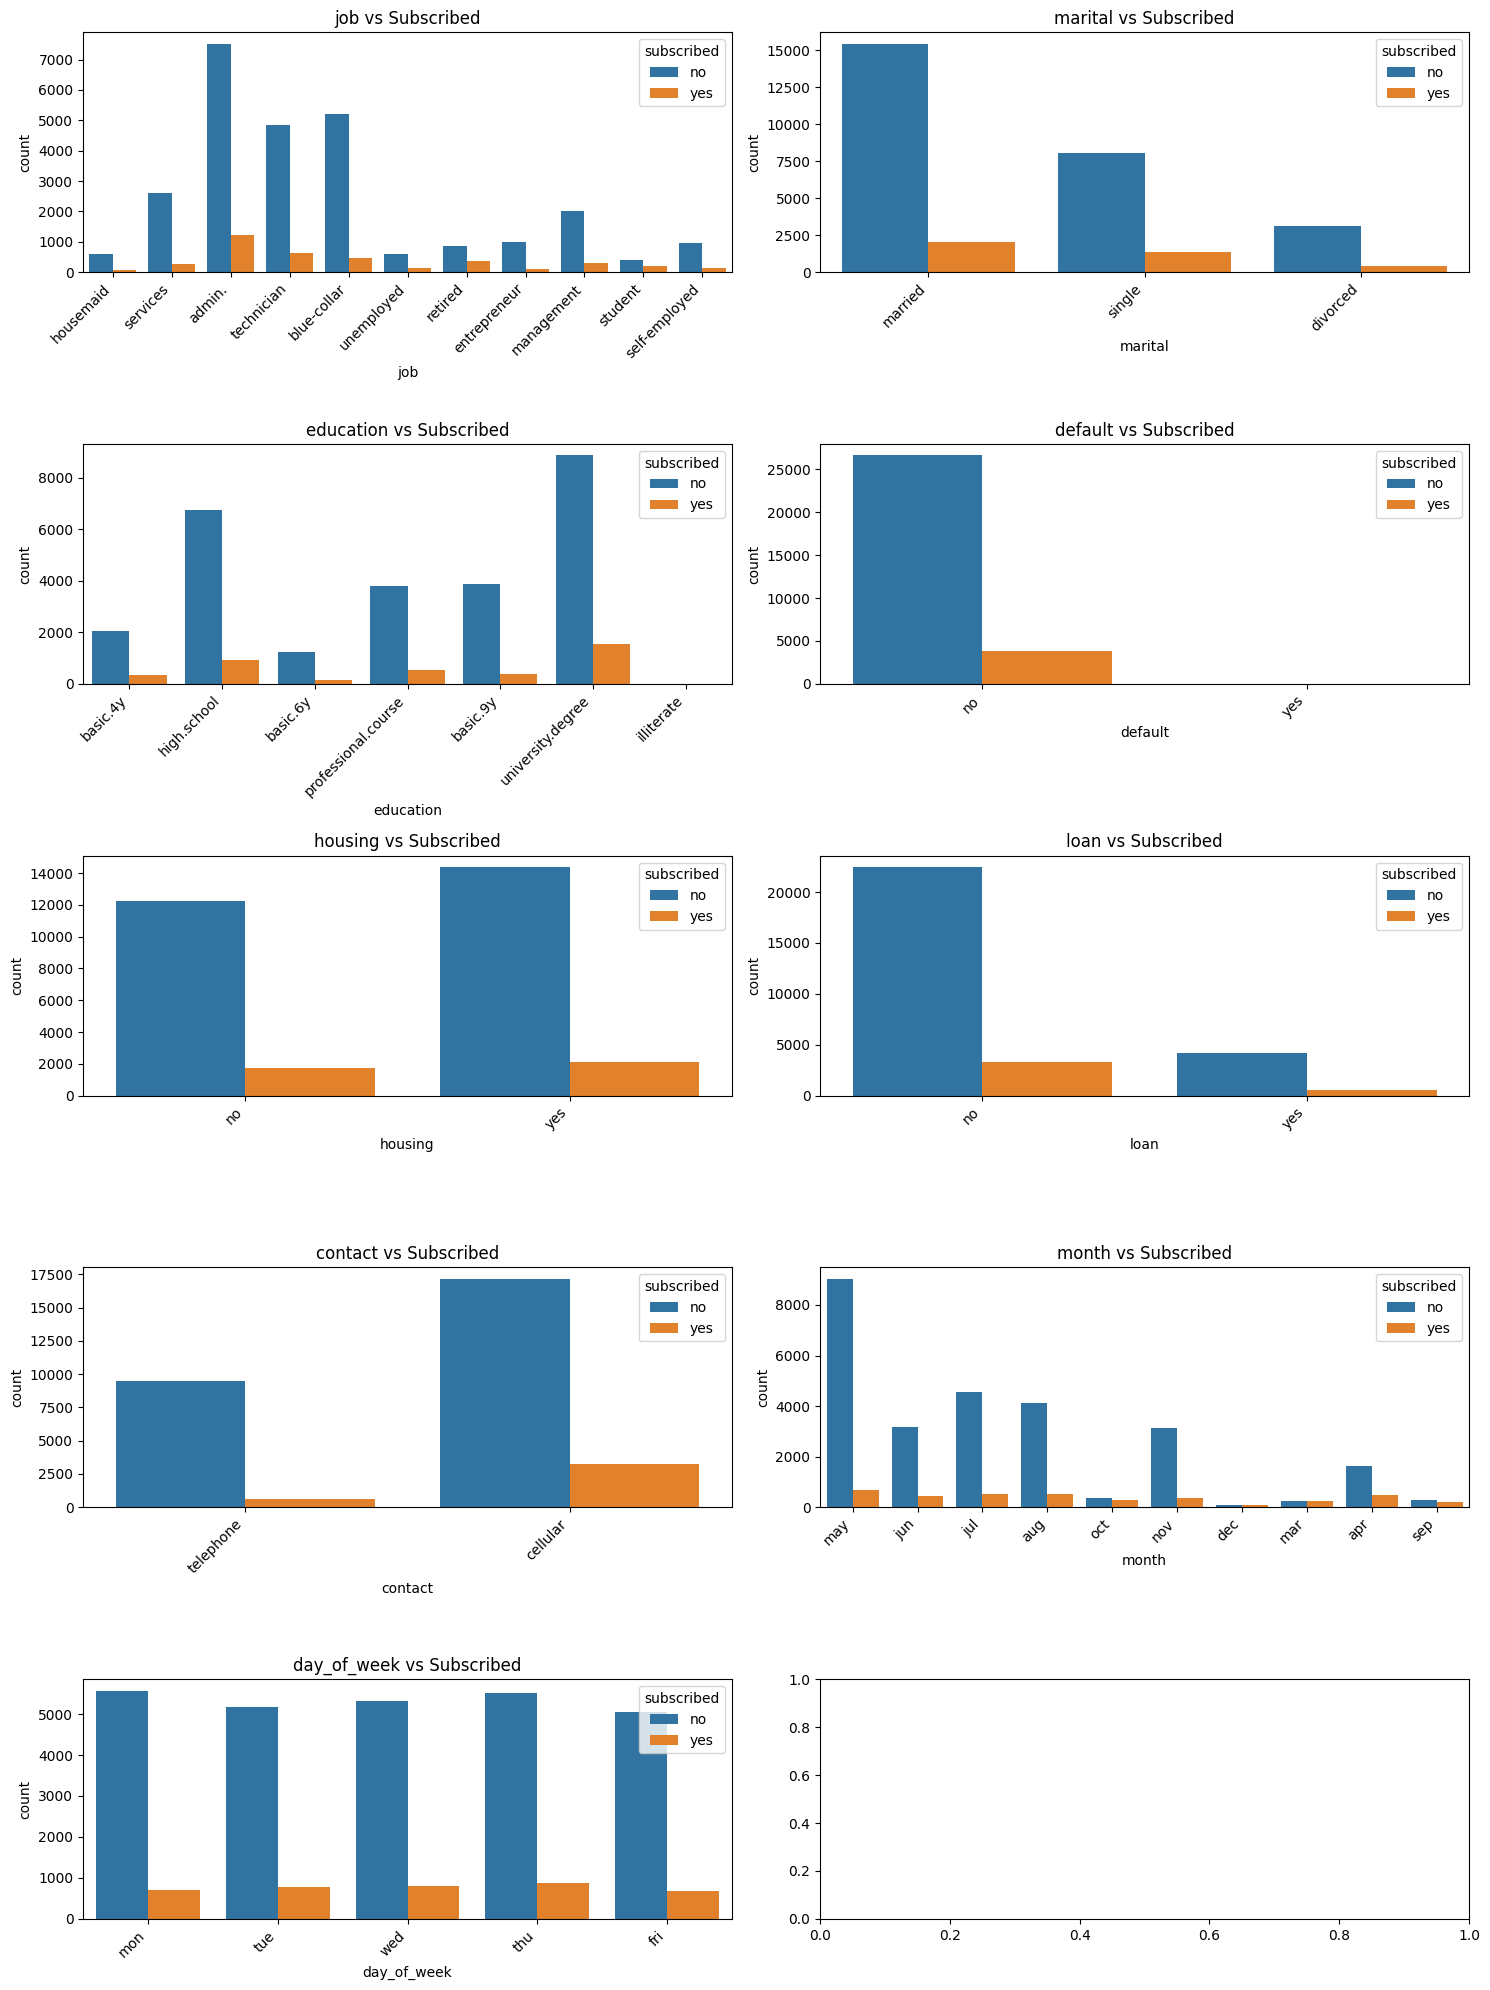

In [9]:
# Set up subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

# Flatten the axes for easy iteration
axes = axes.flatten()

cols_num = ['job', 'marital', 'education', 'default', 'housing', 'loan',
            'contact', 'month', 'day_of_week', 'subscribed']

# Loop through columns and create plots
for i, column in enumerate(cols_num):
    if column != 'subscribed':
        # Bar plot for categorical variables
        if data_temp[column].dtype == 'object':
            sns.countplot(x=column, hue='subscribed', data=data_temp, ax=axes[i])
            axes[i].set_title(f'{column} vs Subscribed')
            axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
        else:
            # Box plot for numerical variables
            sns.boxplot(x='subscribed', y=column, data=data_temp, ax=axes[i])
            axes[i].set_title(f'{column} vs Subscribed')

plt.tight_layout()
plt.show()

## Feature Engineering

In [10]:
# Count unique values in all columns
unique_counts = data_temp.nunique()

# Display the results
print("Unique Value Counts in Each Column:")
print(unique_counts)

Unique Value Counts in Each Column:
age                 76
job                 11
marital              3
education            7
default              2
housing              2
loan                 2
contact              2
month               10
day_of_week          5
duration          1441
campaign            41
previous             8
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          314
nr.employed         11
subscribed           2
dtype: int64


In [11]:
# Select categorical columns
categorical_columns = data_temp.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns[:-1]

# Create a label encoder object
label_encoder = LabelEncoder()

# Iterate through categorical columns and apply label encoding
for column in categorical_columns:
    data_temp[column] = label_encoder.fit_transform(data_temp[column])

<ipython-input-11-88d30743030b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp[column] = label_encoder.fit_transform(data_temp[column])
<ipython-input-11-88d30743030b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp[column] = label_encoder.fit_transform(data_temp[column])
<ipython-input-11-88d30743030b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [12]:
# Encode target variable
data_temp['subscribed'].replace("yes", 1, inplace=True)
data_temp['subscribed'].replace("no", 0, inplace=True)

<ipython-input-12-4780cfa17bb7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp['subscribed'].replace("yes", 1, inplace=True)
<ipython-input-12-4780cfa17bb7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp['subscribed'].replace("no", 0, inplace=True)


In [13]:
# Separate features and target
X = data_temp.drop('subscribed', axis=1)
y = data_temp['subscribed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Base Random Forest Model

In [14]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate Random Forest model
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))

Random Forest Classifier:
Accuracy: 0.9016070842899311
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      5304
           1       0.65      0.54      0.59       794

    accuracy                           0.90      6098
   macro avg       0.79      0.75      0.77      6098
weighted avg       0.90      0.90      0.90      6098

Confusion Matrix:
 [[5067  237]
 [ 363  431]]


## Base SVM Model

In [15]:
# Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
svm_predictions = svm_model.predict(X_test)

# Evaluate SVM model
print("\nSupport Vector Machine:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions))


Support Vector Machine:
Accuracy: 0.8732371269268613
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93      5304
           1       0.69      0.05      0.09       794

    accuracy                           0.87      6098
   macro avg       0.78      0.52      0.51      6098
weighted avg       0.85      0.87      0.82      6098

Confusion Matrix:
 [[5287   17]
 [ 756   38]]


## Fine Tuned & Cross Validated Random Forest Model

In [16]:
# Random Forest Classifier
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Best parameters and best score for Random Forest
print("Random Forest Best Parameters:", rf_grid_search.best_params_)
print("Random Forest Best Score:", rf_grid_search.best_score_)

# Predictions with the best Random Forest model
rf_best_model = rf_grid_search.best_estimator_
rf_predictions = rf_best_model.predict(X_test)

# Evaluate Random Forest model
print("\nRandom Forest Classifier (Best Model):")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))

Random Forest Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Random Forest Best Score: 0.9052070520705208

Random Forest Classifier (Best Model):
Accuracy: 0.9032469662184323
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      5304
           1       0.65      0.55      0.60       794

    accuracy                           0.90      6098
   macro avg       0.79      0.75      0.77      6098
weighted avg       0.90      0.90      0.90      6098

Confusion Matrix:
 [[5071  233]
 [ 357  437]]


## Fine Tuned & Cross Validated SVM Model

In [17]:
# Support Vector Machine (SVM)
svm_param_grid = {
    'C': [0.1, 1],
    'gamma': ['scale', 'auto']
}

svm_model = SVC(random_state=42)
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid_search.fit(X_train, y_train)

# Best parameters and best score for SVM
print("\nSupport Vector Machine Best Parameters:", svm_grid_search.best_params_)
print("Support Vector Machine Best Score:", svm_grid_search.best_score_)

# Predictions with the best SVM model
svm_best_model = svm_grid_search.best_estimator_
svm_predictions = svm_best_model.predict(X_test)

# Evaluate SVM model
print("\nSupport Vector Machine (Best Model):")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions))


Support Vector Machine Best Parameters: {'C': 1, 'gamma': 'scale'}
Support Vector Machine Best Score: 0.8762607626076262

Support Vector Machine (Best Model):
Accuracy: 0.8732371269268613
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93      5304
           1       0.69      0.05      0.09       794

    accuracy                           0.87      6098
   macro avg       0.78      0.52      0.51      6098
weighted avg       0.85      0.87      0.82      6098

Confusion Matrix:
 [[5287   17]
 [ 756   38]]


## Saving Best Model

In [18]:
import joblib
# Save the trained Random Forest model to a file
filename = 'rf_trained_model.joblib'
joblib.dump(rf_grid_search.best_estimator_, filename)

print(f"Random Forest Best Model saved as {filename}")

Random Forest Best Model saved as rf_trained_model.joblib


In [19]:
import joblib

# Load the trained Random Forest model
model = joblib.load('rf_trained_model.joblib')

In [20]:
# Read test set.
data_test = pd.read_csv("Bank_Campaign.csv", sep = ";")

# Preparing test data.
data_test['poutcome'].replace("nonexistent", np.nan, inplace=True)
data_test['loan'].replace("unknown", np.nan, inplace=True)
data_test['housing'].replace("unknown", np.nan, inplace=True)
data_test['default'].replace("unknown", np.nan, inplace=True)
data_test['education'].replace("unknown", np.nan, inplace=True)
data_test['marital'].replace("unknown", np.nan, inplace=True)
data_test['job'].replace("unknown", np.nan, inplace=True)
data_test = data_test.drop(['pdays', 'poutcome', 'subscribed'], axis = 1)
data_test = data_test.dropna()

# Select categorical columns
categorical_columns = data_test.select_dtypes(include=['object']).columns
# Create a label encoder object
label_encoder = LabelEncoder()

# Iterate through categorical columns and apply label encoding
for column in categorical_columns:
    data_test[column] = label_encoder.fit_transform(data_test[column])

data_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,0,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,1,0,1,6,1,226,1,0,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,151,1,0,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,1,1,6,1,307,1,0,1.1,93.994,-36.4,4.857,5191.0
6,59,0,1,5,0,0,0,1,6,1,139,1,0,1.1,93.994,-36.4,4.857,5191.0


In [21]:
# Make predictions
predictions = model.predict(data_test)

# Add prediction as a new column and save the file as csv
data_test['Prediction'] = predictions
data_test.to_csv("predictions.csv")